In [1]:
#Unit 4 Homework Assignment: A Whale Off the Port(folio)
import pandas as pd
#Import Data Files as DataFrames
algo_returns=pd.read_csv("/Users/aliait/Desktop/algo_returns.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_tsx_history=pd.read_csv("/Users/aliait/Desktop/sp_tsx_history.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns=pd.read_csv("/Users/aliait/Desktop/whale_returns.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
#View Data 
algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [2]:
#View Data 
sp_tsx_history.head(5)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [3]:
#View Data 
whale_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Verify if any null data
algo_returns.isnull().mean()

Algo 1    0.000000
Algo 2    0.004835
dtype: float64

In [5]:
#Verify if any null data
sp_tsx_history.isnull().mean()

Close    0.0
dtype: float64

In [6]:
#Verify if any null data
whale_returns.isnull().mean()

SOROS FUND MANAGEMENT LLC      0.000943
PAULSON & CO.INC.              0.000943
TIGER GLOBAL MANAGEMENT LLC    0.000943
BERKSHIRE HATHAWAY INC         0.000943
dtype: float64

In [7]:
#Drop Null Data
algo_returns=algo_returns.dropna().copy()
whale_returns=whale_returns.dropna().copy()

In [8]:
#Verify if null data was removed
algo_returns.isnull().mean()

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [9]:
#Verify if null data was removed
whale_returns.isnull().mean()

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

In [10]:
#Remove $ Sign and "," from SP TSX Closing Price:
sp_tsx_history["Close"] = sp_tsx_history["Close"].replace({'\$':''}, regex = True)
sp_tsx_history["Close"] = sp_tsx_history["Close"].replace({'\,':''}, regex = True)

In [11]:
#Verify if $ Sign and "," was removed:
sp_tsx_history.head(5)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
#Convert Data Types of SP TSX History to calculate daily returns
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(float)
#Verify if Close Prices are float data types
sp_tsx_history.dtypes

Close    float64
dtype: object

In [13]:
#Compute Daily Return for SP TSX History:
return_sp_tsx_history=sp_tsx_history.pct_change()
#Drop Null Value for Daily Return for SP TSX History:
return_sp_tsx_history=return_sp_tsx_history.dropna().copy()
return_sp_tsx_history.head(5)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
#Join different DataFrames in a single DataFrame
all_data=pd.concat([whale_returns,algo_returns,return_sp_tsx_history],axis="columns", join="inner")
all_data.rename(columns = {'Close':'S&P TSX'}, inplace = True)
all_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


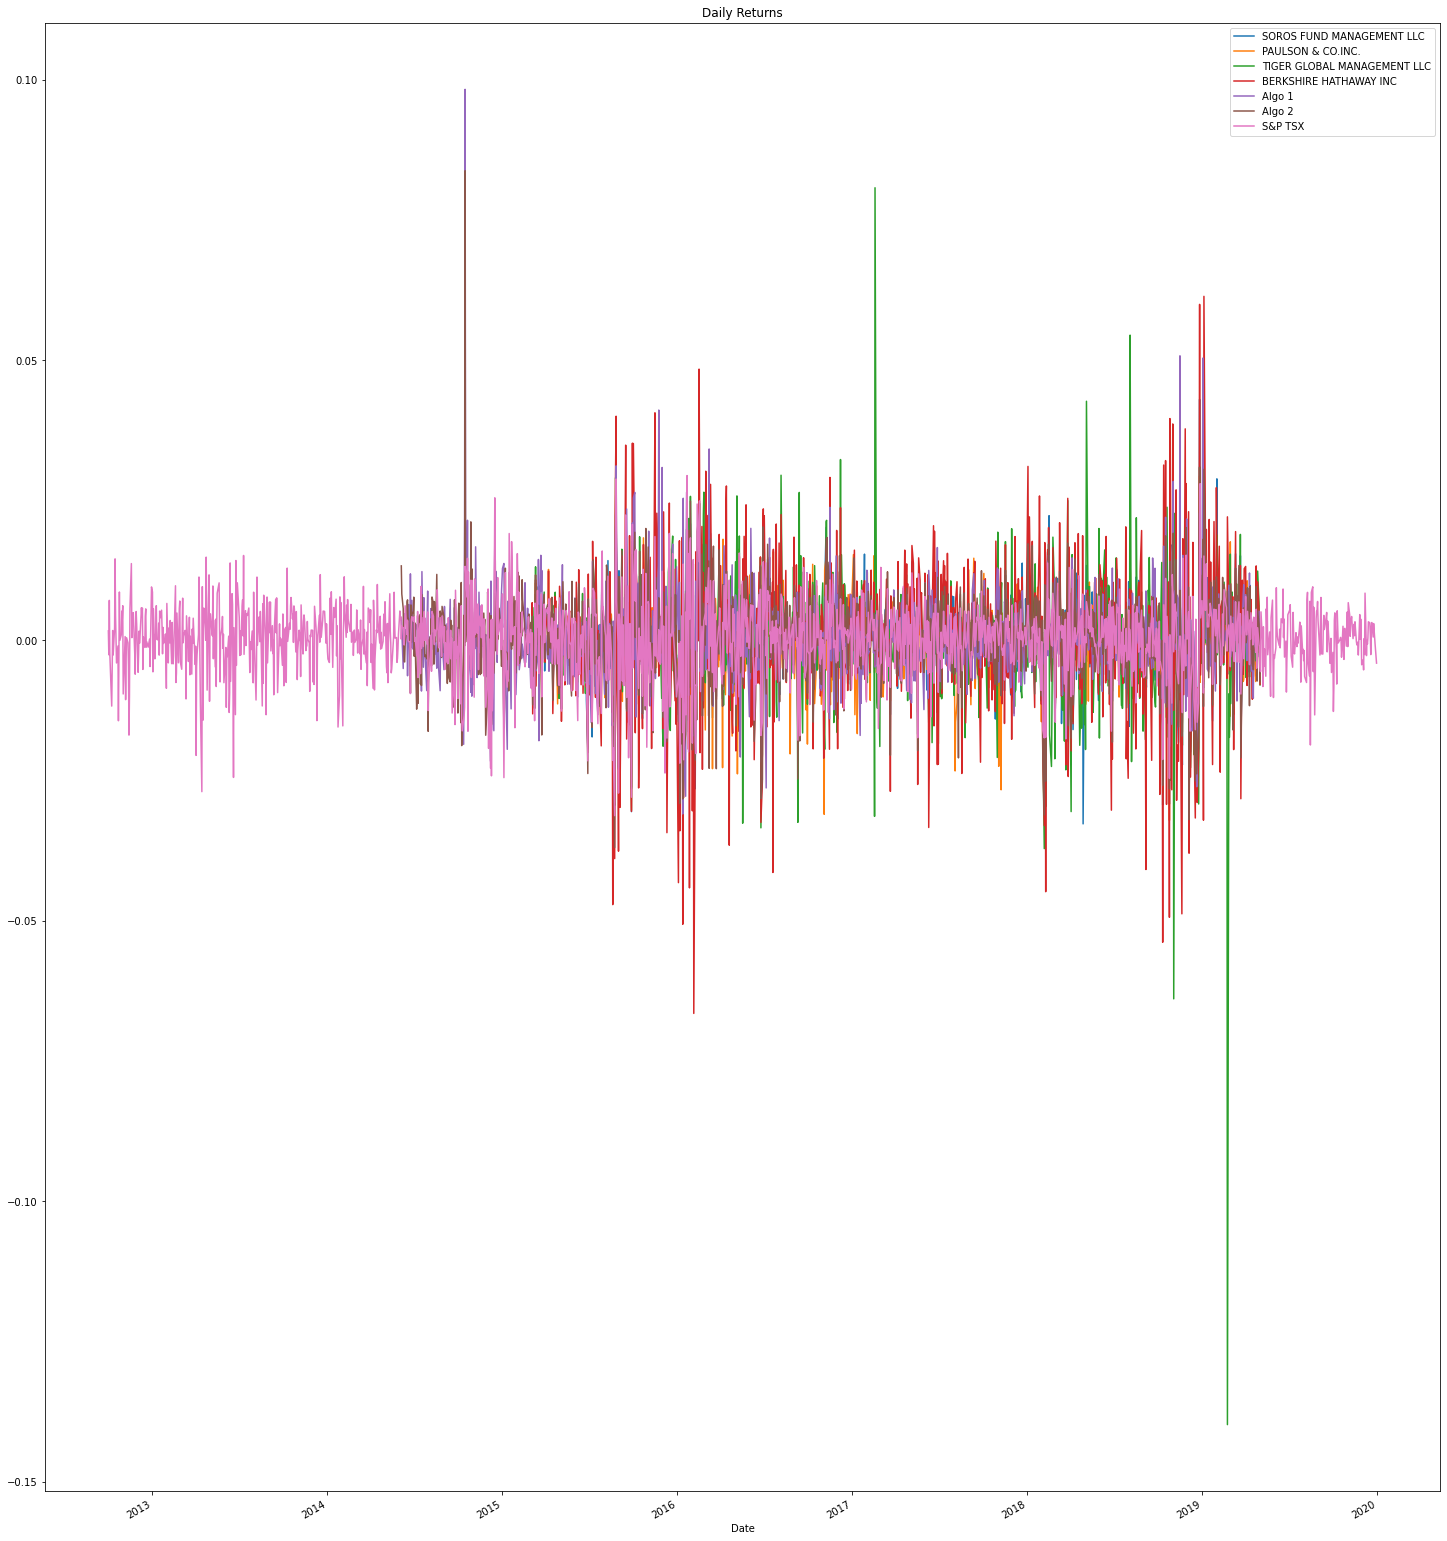

In [15]:
#Plot Daily Returns of all portfolios:
ax=whale_returns.plot(figsize=(25,30),title="Daily Returns")
algo_returns.plot(ax=ax)
return_sp_tsx_history.plot(ax=ax)
ax.legend(["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","S&P TSX"])

In [16]:
#Compute cumulative returns of all portfolio:
all_data.sum()

SOROS FUND MANAGEMENT LLC      0.145473
PAULSON & CO.INC.             -0.247841
TIGER GLOBAL MANAGEMENT LLC   -0.101903
BERKSHIRE HATHAWAY INC         0.388283
Algo 1                         0.733703
Algo 2                         0.214171
S&P TSX                        0.089163
dtype: float64

Text(0, 0.5, 'Return')

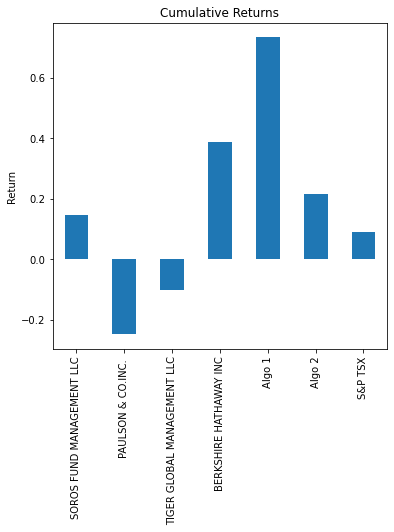

In [17]:
#Plot Cumulative Returns 
chart_all_data=all_data.sum().plot.bar(figsize=(6,6),title="Cumulative Returns")
chart_all_data.set_ylabel('Return',fontsize=10)

In [18]:
#Based on the chart and computation above, the following portfolios outperfromed the S&P TSX 60:
#Soros Fund Management LLC, Berkshire Heathaway Inc and Harold's Algo 1 & 2.

Text(0, 0.5, 'Return')

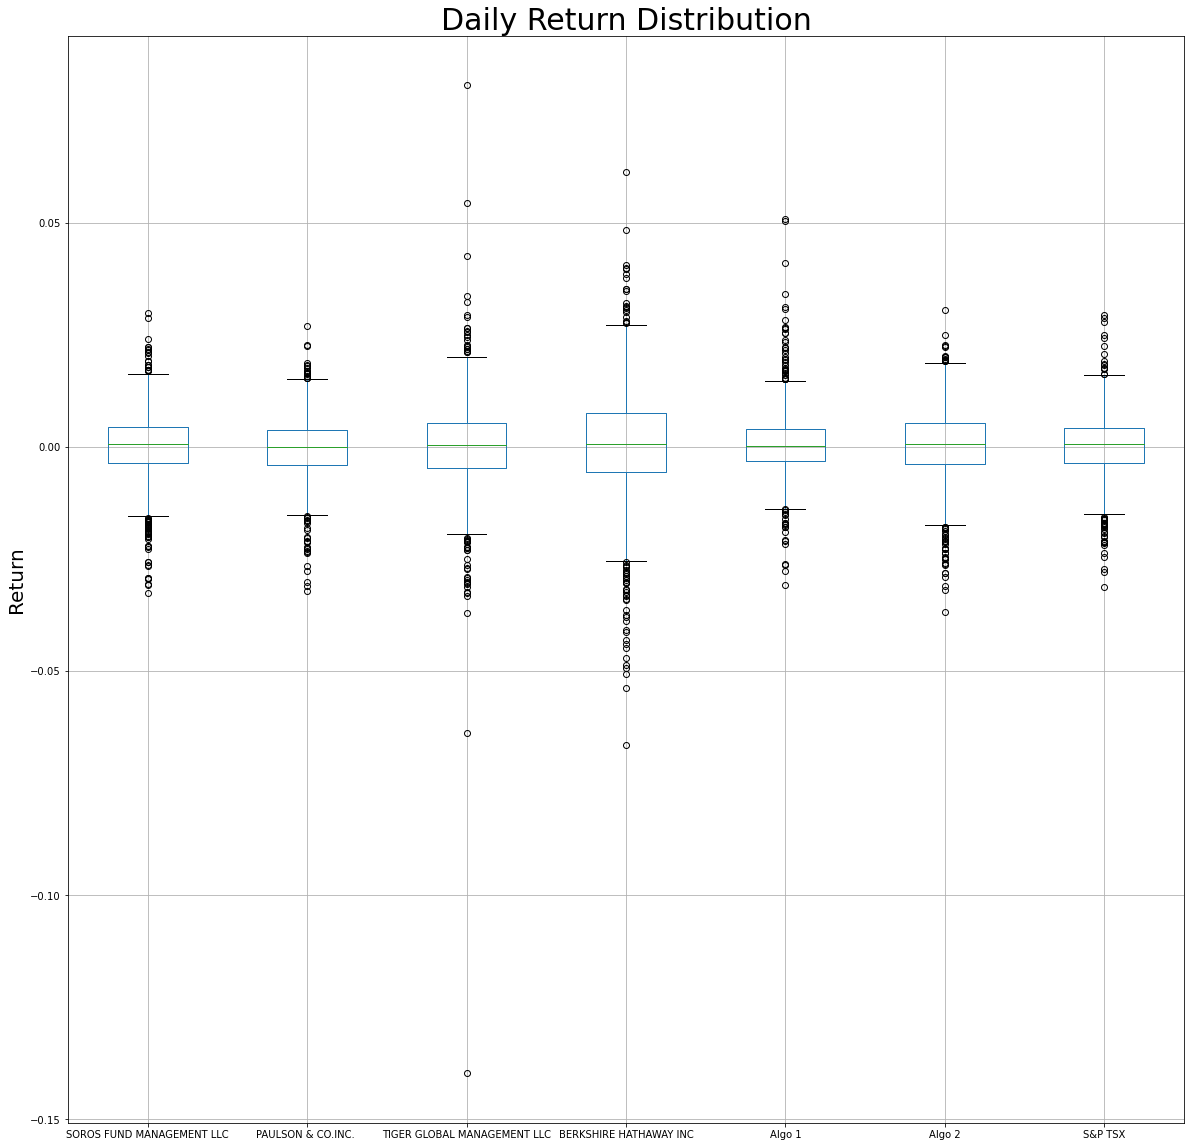

In [19]:
#Create a box plot for each portfolio
box_plot_all_data=all_data.boxplot(figsize=(20,20))
box_plot_all_data.set_title('Daily Return Distribution',fontsize=30)
box_plot_all_data.set_ylabel('Return',fontsize=20)

In [20]:
#Calculate Standard Deviation for each portfolio:
all_data.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

In [21]:
#The Portfolios that are riskier than the S&P TSX 60:
#Soros Fund Management LLC, Tiger Global Management LLC, Berkshire Hataway Inc, Algo 1 & Algo 2

In [22]:
#Calculate Annualized Standard Deviation for each portfolio:
all_data.std()/252

SOROS FUND MANAGEMENT LLC      0.000031
PAULSON & CO.INC.              0.000028
TIGER GLOBAL MANAGEMENT LLC    0.000043
BERKSHIRE HATHAWAY INC         0.000051
Algo 1                         0.000030
Algo 2                         0.000033
S&P TSX                        0.000028
dtype: float64

In [42]:
#Calculate Rolling Standard Deviation using 21-day window for each portfolio:
rolling_21_all_data=all_data.rolling(window=21).std().dropna()
rolling_21_all_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

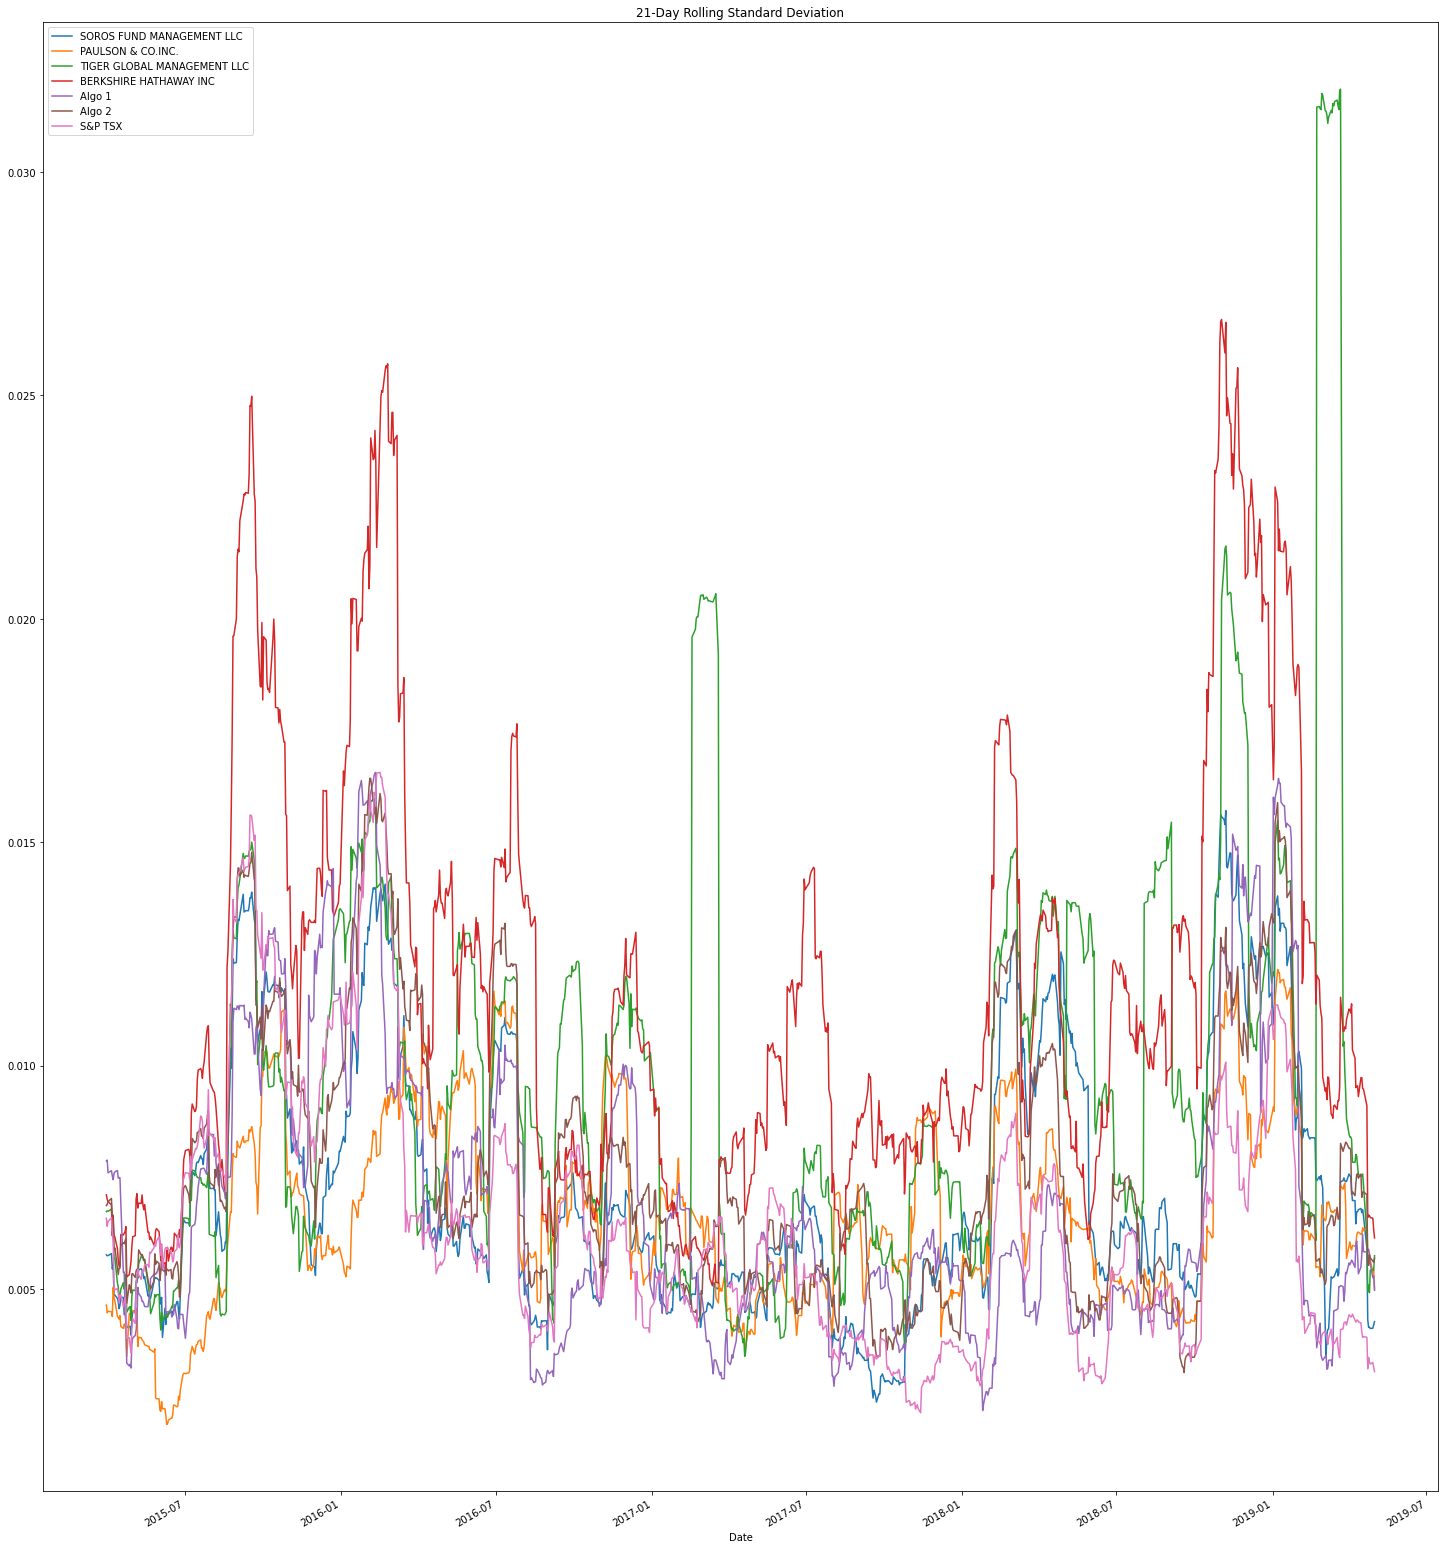

In [24]:
#Plot Rolling Standard Deviation:
rolling_21_all_data.plot(figsize=(25,30),title="21-Day Rolling Standard Deviation")

In [25]:
#Calculate Correlation: 
correlation=all_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


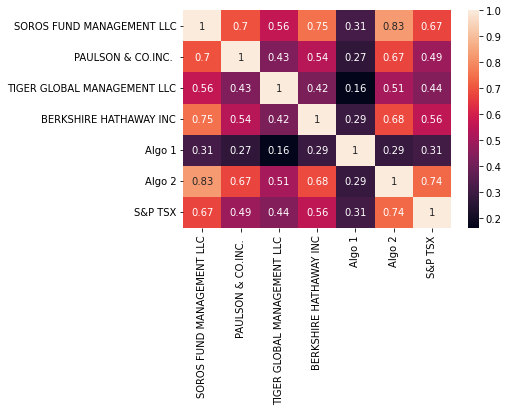

In [26]:
#Display Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
Heat_Map_Correlation = sns.heatmap(correlation, annot = True)

In [27]:
#From the heatmap above and the correlation calculation it seems that Algo 2 is the most correlated to the S&P TSX

In [57]:
# Calculate covariance of a single portfolio
rolling_covariance_algo2=all_data["Algo 2"].rolling(window=60).cov(all_data["S&P TSX"])
# Calculate variance of S&P TSX
rolling_variance_sp_tsx=all_data["S&P TSX"].rolling(window=60).var()
# Beta Algo 2, S&P TSX: 
beta_algo2=rolling_covariance_algo2/rolling_variance_sp_tsx
print(beta_algo2)

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.014041
2019-04-26    1.014918
2019-04-29    0.991566
2019-04-30    1.008943
2019-05-01    1.020958
Length: 1029, dtype: float64


<AxesSubplot:title={'center':'60-Day Rolling Beta Algo 2/S&P TSX'}, xlabel='Date'>

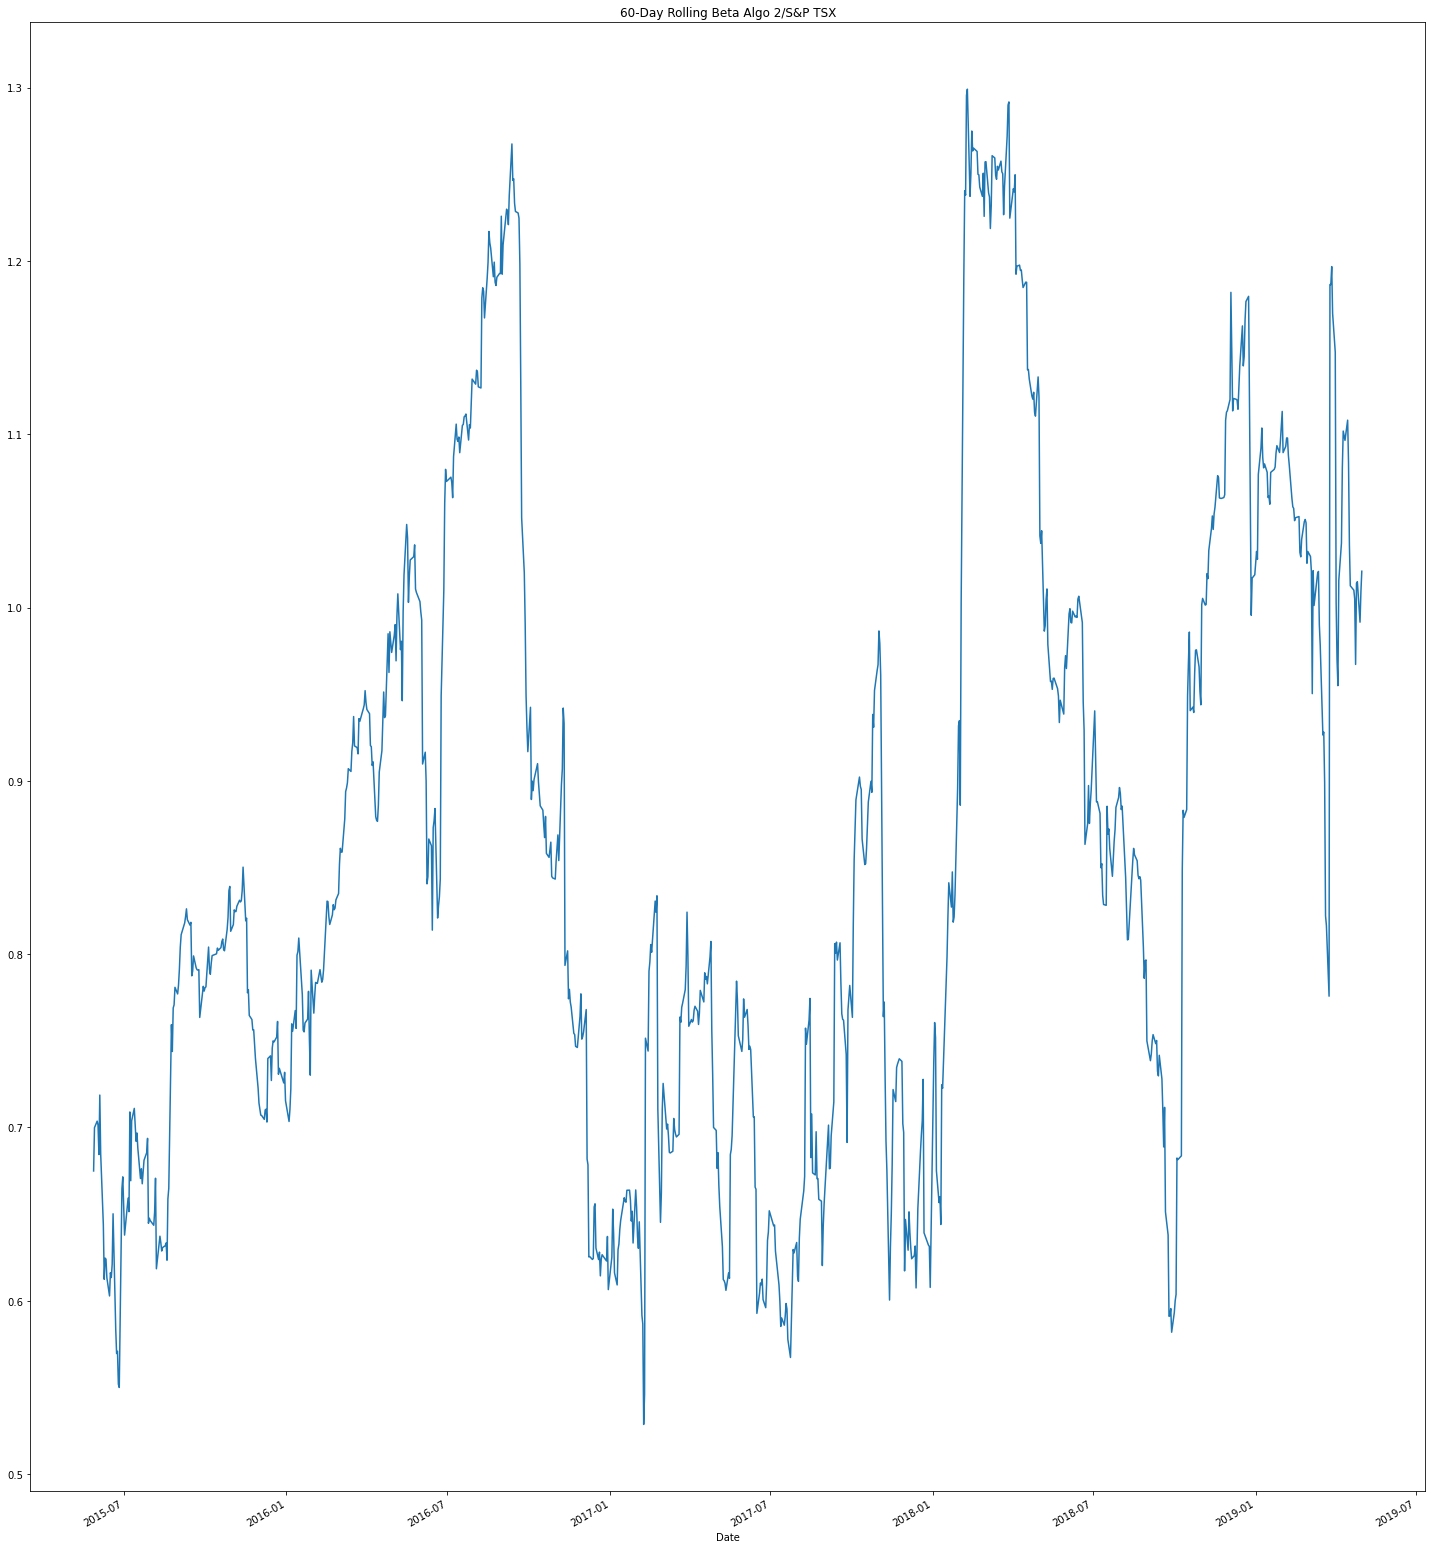

In [28]:
# Plot the 60-day rolling beta: 
beta_algo2.plot(figsize=(25,30),title="60-Day Rolling Beta Algo 2/S&P TSX")

In [29]:
#Exponentinally weighted average: 
all_data.ewm(halflife=21).std().head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX                        0.000000
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratio'}>

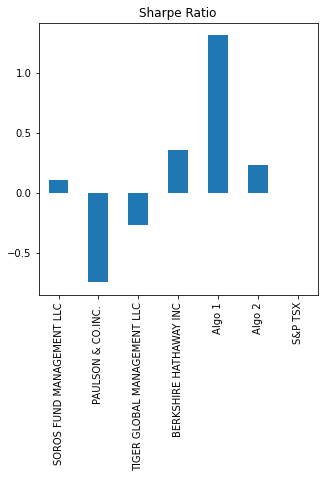

In [44]:
#Calculate the Sharpe Ratio for the portfolios
import numpy as np
sharpe_ratios = ((all_data.mean()-all_data['S&P TSX'].mean())* 252) / (all_data.std() * np.sqrt(252))
print(sharpe_ratios)
#Plot the Sharpe Ratio
sharpe_ratios.plot.bar(figsize=(5,5),title="Sharpe Ratio")

In [31]:
#The Algorithmic strategies are outperforming the whales portfolio as we can see with higher sharpe ratios

In [32]:
#Import Portfolio Returns: Stock chosen: Tesla, Microsoft and Nvidia
tsla_stock=pd.read_csv("/Users/aliait/Desktop/TSLA Stock.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
msft_stock=pd.read_csv("/Users/aliait/Desktop/MSFT Stock.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
nvda_stock=pd.read_csv("/Users/aliait/Desktop/NVDA Stock.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_stock.rename(columns = {'Close':'TSLA'}, inplace = True)
msft_stock.rename(columns = {'Close':'MSFT'}, inplace = True)
nvda_stock.rename(columns = {'Close':'NVDA'}, inplace = True)


In [33]:
#Join different stocks to create my portfolio and check for any null values:
my_portfolio=pd.concat([tsla_stock,msft_stock,nvda_stock],axis="columns", join="inner")
my_portfolio.isnull().mean()

TSLA    0.0
MSFT    0.0
NVDA    0.0
dtype: float64

In [34]:
#Compute the return of the portfolio
my_portfolio_return=my_portfolio.pct_change()
#Drop Null Values
my_portfolio_return=my_portfolio_return.dropna().copy()
#Create new data set for weighted return
my_portfolio_return_w=(my_portfolio_return["TSLA"]+my_portfolio_return["MSFT"]+my_portfolio_return["NVDA"])/3
#Consolidate my portfolio weighted return with rest of the data
new_data=pd.concat([all_data,my_portfolio_return_w],axis="columns", join="inner")
#Renaming Columns of added data: My Portfolio
new_data.rename(columns = {0:'My Portfolio'}, inplace = True)
#Verify that new data frame looks good
new_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.006753
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.003959
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.021675
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.000710
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.001527


In [35]:
#Calculate the Annualized Standard Deviation.
new_data.std()/252

SOROS FUND MANAGEMENT LLC      0.000031
PAULSON & CO.INC.              0.000028
TIGER GLOBAL MANAGEMENT LLC    0.000040
BERKSHIRE HATHAWAY INC         0.000052
Algo 1                         0.000031
Algo 2                         0.000033
S&P TSX                        0.000029
My Portfolio                   0.000070
dtype: float64

In [51]:
#Calculate and plot rolling std with a 21-day window.
rolling_21_new_data=new_data.rolling(window=21).std().dropna()
rolling_21_new_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404,0.013587
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509,0.013499
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596,0.016515
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295,0.015839
2015-04-08,0.005549,0.005034,0.006419,0.006654,0.007447,0.006561,0.006069,0.015948


<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

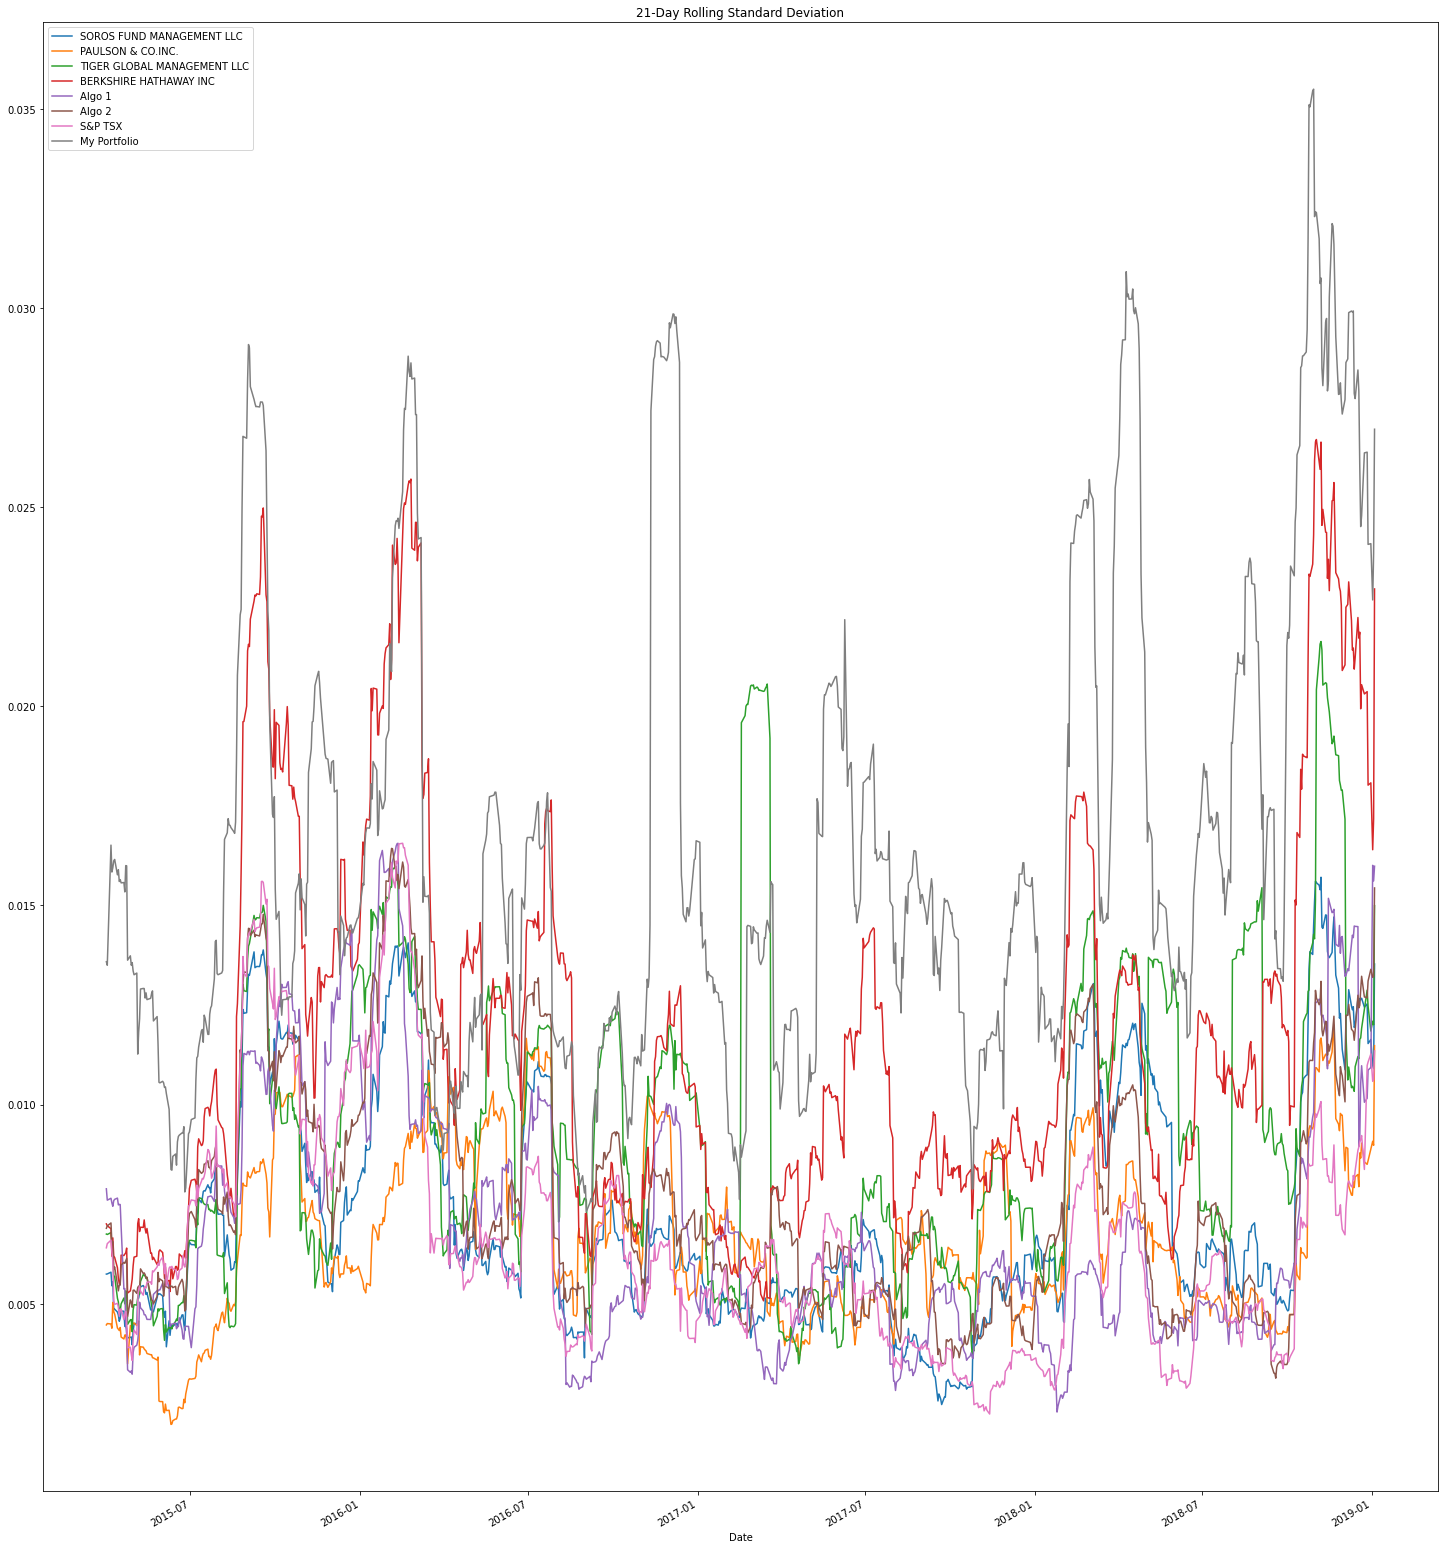

In [52]:
rolling_21_new_data.plot(figsize=(25,30),title="21-Day Rolling Standard Deviation")

In [37]:
#Calculate and plot the correlation.
new_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.696923,0.610848,0.753619,0.328599,0.829757,0.677896,0.602977
PAULSON & CO.INC.,0.696923,1.000000,0.474252,0.541142,0.276116,0.673991,0.492685,0.426761
TIGER GLOBAL MANAGEMENT LLC,0.610848,0.474252,1.000000,0.484180,0.186203,0.568728,0.484937,0.447101
BERKSHIRE HATHAWAY INC,0.753619,0.541142,0.484180,1.000000,0.296417,0.682661,0.555810,0.646009
Algo 1,0.328599,0.276116,0.186203,0.296417,1.000000,0.295783,0.317410,0.177670
Algo 2,0.829757,0.673991,0.568728,0.682661,0.295783,1.000000,0.741793,0.592091
S&P TSX,0.677896,0.492685,0.484937,0.555810,0.317410,0.741793,1.000000,0.439133
My Portfolio,0.602977,0.426761,0.447101,0.646009,0.177670,0.592091,0.439133,1.000000


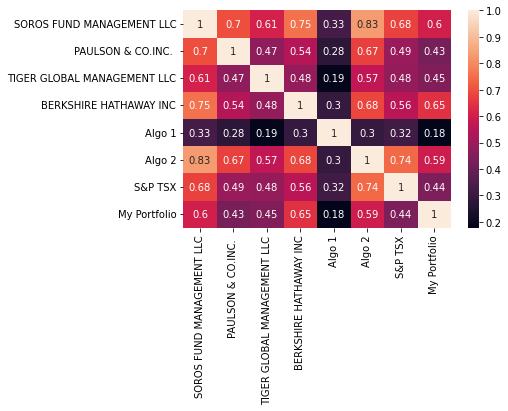

In [38]:
New_Heat_Map_Correlation = sns.heatmap(new_data.corr(), annot = True)

In [58]:
#Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.

# Calculate covariance of a my portfolio
rolling_covariance_my_portfolio=new_data["My Portfolio"].rolling(window=60).cov(new_data["S&P TSX"])
# Calculate variance of S&P TSX
rolling_variance_sp_tsx=new_data["S&P TSX"].rolling(window=60).var()
# Beta Algo 2, S&P TSX: 
beta_my_portfolio=rolling_covariance_my_portfolio/rolling_variance_sp_tsx
beta_my_portfolio

Date
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
                ...   
2018-12-28    1.600401
2018-12-31    1.532092
2019-01-02    1.515604
2019-01-03    1.563887
2019-01-04    1.661862
Length: 948, dtype: float64

<AxesSubplot:title={'center':'60-Day Rolling Beta My Portfolio/S&P TSX'}, xlabel='Date'>

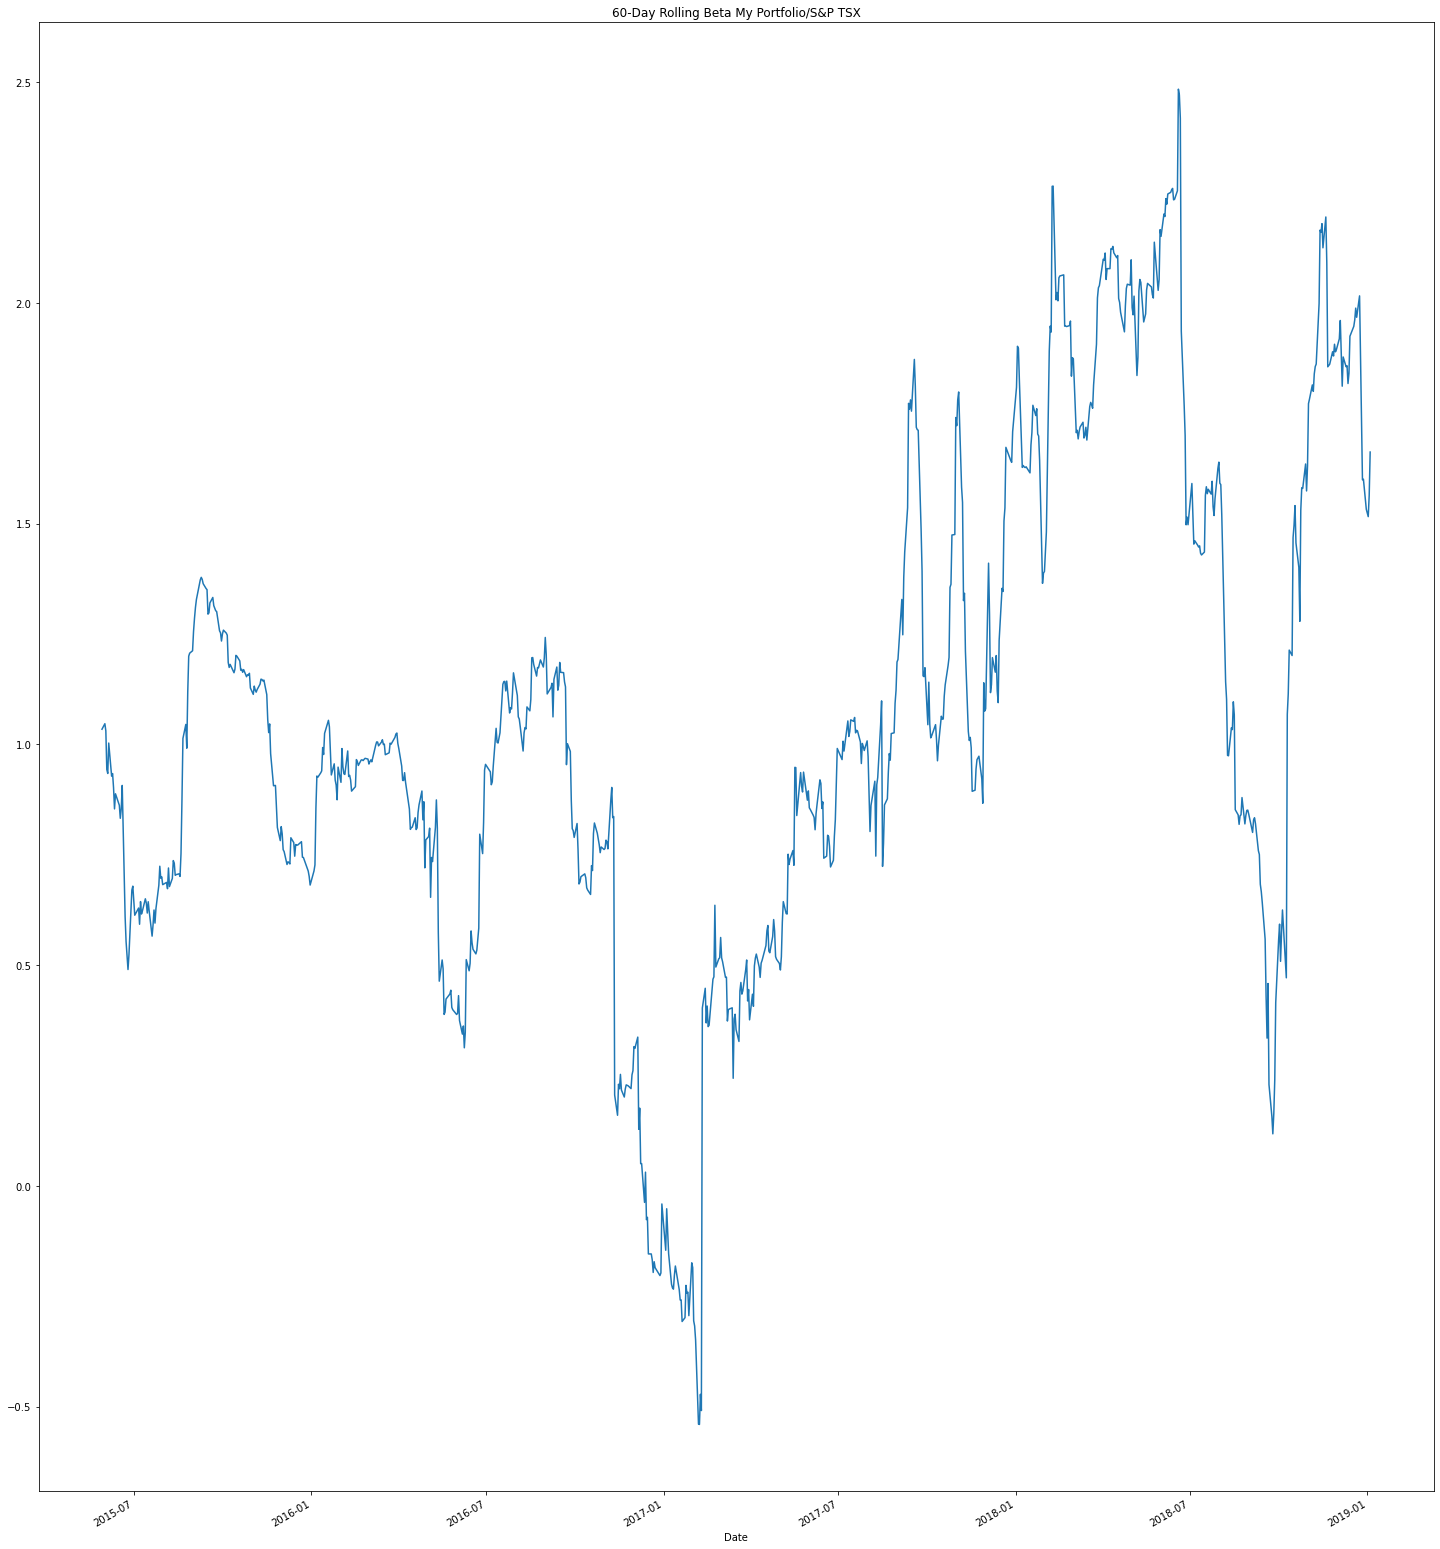

In [54]:
# Plot the 60-day rolling beta: 
beta_my_portfolio.plot(figsize=(25,30),title="60-Day Rolling Beta My Portfolio/S&P TSX")

In [59]:
#Calculate the Sharpe ratios and generate a bar plot.
import numpy as np
sharpe_ratios_my_portfolio = ((new_data.mean()-new_data['S&P TSX'].mean()) * 252) / (new_data.std() * np.sqrt(252))
print(sharpe_ratios_my_portfolio)

SOROS FUND MANAGEMENT LLC      0.042291
PAULSON & CO.INC.             -0.655310
TIGER GLOBAL MANAGEMENT LLC   -0.016046
BERKSHIRE HATHAWAY INC         0.234462
Algo 1                         1.508563
Algo 2                         0.179895
S&P TSX                        0.000000
My Portfolio                   1.228409
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratio'}>

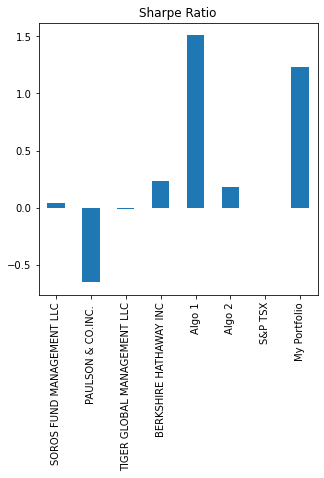

In [60]:
#Plot the Sharpe Ratio
sharpe_ratios_my_portfolio.plot.bar(figsize=(5,5),title="Sharpe Ratio")

In [41]:
#My Portfolio has a high standard deviation which was expected with only 3 stocks, which creates more volatity than other portfolios that have a lot more stocks
#The Sharpe Ratio is good comparing to other options: It can lean to high returns but is also very risky due to high volatility and lack of diversification